<a href="https://colab.research.google.com/github/umutberkay/Activity-Recognition-of-Weight-Lifting-Exercises-/blob/main/Image_Alignment_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image alignment

In this task, you will have to solve two image alignment problems: channel processing and face alignment. You can get **10 points** implementing all the passed functions (7.5 for the first part and 2.5 for the second one).

# Image channels processing and alignment (7.5 points)

## Problem review

Sergey Prokudin-Gorsky was the first color photographer in Russia, who made the color portrait of Leo Tolstoy. Each of his photographs is three black-and-white photo plates, corresponding to red, green, and blue color channels. Currently, the collection of his pictures is situated in the U.S. Library of Congress, the altered versions have proliferated online. In this task, you should make a programme which will align the images from the Prokudin-Gorsky plates and learn the basic image processing methods.

*The input image and the result of the alignment:*
<img src="http://cdn1.savepice.ru/uploads/2017/7/31/8e68237bfd49026d137f59283db18b29-full.png">

In [ ]:
%pylab inline
import matplotlib.pyplot as plt 
import numpy as np

Populating the interactive namespace from numpy and matplotlib


## Problem description

#### Input image loading

The input image is the set of 3 plates, corresponding to B, G, and R channels (top-down). You should implement the function $\tt{load}$\_$\tt{data}$ that reads the data and returns the list of images of plates.
$\tt{dir}$\_$\tt{name}$ is the path to the directory with plate images. If this directory is located in the same directory as this notebook, then default arguments can be used.

In [ ]:
import cv2,os

In [ ]:
def load_data(dir_name = 'plates'):
    
    plates=[]
    for filename in os.listdir(dir_name):
        img = cv2.imread(os.path.join(dir_name,filename),0)
        if img is not None:
            plates.append(img)
    return plates

plates = load_data()

In [ ]:
print(plates[0].shape)

(1153, 448)


The dataset is a list of 2-dimensional arrays.

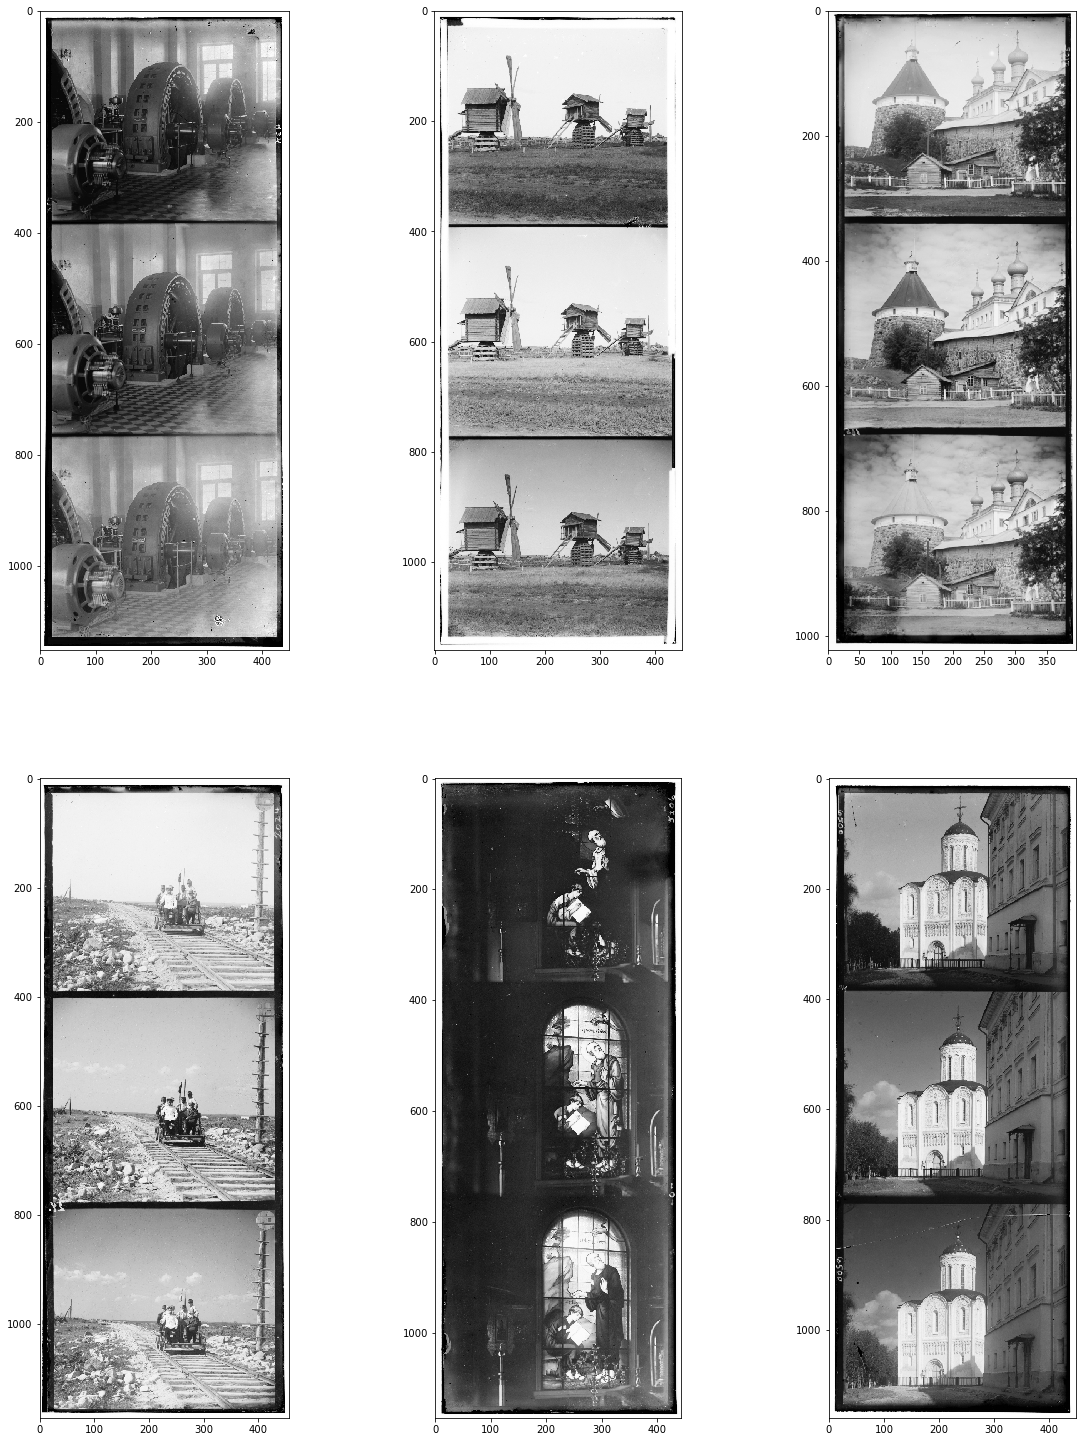

In [ ]:
# The auxiliary function `visualize()` displays the images given as argument.
def visualize(imgs, format=None):
    plt.figure(figsize=(20, 40))
    for i, img in enumerate(imgs):
        if img.shape[0] == 3:
            img = img.transpose(1,2,0)
        plt_idx = i+1
        plt.subplot(3, 3, plt_idx)    
        plt.imshow(img, cmap=format)
    plt.show()

visualize(plates, 'gray')

#### Canny detector implementation (2.5 points)
You can write your own implementation of Canny edge detector to get extra points. <br>

Canny detection algorithm:
1. *Noise reduction.* To remove noise, the image is smoothed by Gaussian blur with the kernel of size $5 \times 5$ and $\sigma = 1.4$. Since the sum of the elements in the Gaussian kernel equals $1$, the kernel should be normalized before the convolution. <br><br>

2. *Calculating gradients.* When the image $I$ is smoothed, the derivatives $I_x$ and $I_y$ w.r.t. $x$ and $y$ are calculated. It can be implemented by convolving $I$ with Sobel kernels $K_x$ and $K_y$, respectively: 
$$ K_x = \begin{pmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{pmatrix}, K_y = \begin{pmatrix} 1 & 2 & 1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{pmatrix}. $$ 
Then, the magnitude $G$ and the slope $\theta$ of the gradient are calculated:
$$ |G| = \sqrt{I_x^2 + I_y^2}, $$
$$ \theta(x,y) = arctan\left(\frac{I_y}{I_x}\right)$$<br><br>

3. *Non-maximum suppression.* For each pixel find two neighbors (in the positive and negative gradient directions, supposing that each neighbor occupies the angle of $\pi /4$, and $0$ is the direction straight to the right). If the magnitude of the current pixel is greater than the magnitudes of the neighbors, nothing changes, otherwise, the magnitude of the current pixel is set to zero.<br><br>

4. *Double threshold.* The gradient magnitudes are compared with two specified threshold values, the first one is less than the second. The gradients that are smaller than the low threshold value are suppressed; the gradients higher than the high threshold value are marked as strong ones and the corresponding pixels are included in the final edge map. All the rest gradients are marked as weak ones and pixels corresponding to these gradients are considered in the next step.<br><br>

5. *Edge tracking by hysteresis.* Since a weak edge pixel caused from true edges will be connected to a strong edge pixel, pixel $w$ with weak gradient is marked as edge and included in the final edge map if and only if it is involved in the same blob (connected component) as some pixel $s$ with strong gradient. In other words, there should be a chain of neighbor weak pixels connecting $w$ and $s$ (the neighbors are 8 pixels around the considered one). You are welcome to make up and implement an algorithm that finds all the connected components of the gradient map considering each pixel only once.  After that, you can decide which pixels will be included in the final edge map (this algorithm should be single-pass, as well).

In [ ]:
from scipy import ndimage

This takes time, please wait...
Running on image 1...
Gaussian blurring running...
Finding gradient running...
Non maximum suppression running...
Double thresholding running...
Hysteresis running...
Running on image 2...
Gaussian blurring running...
Finding gradient running...
Non maximum suppression running...
Double thresholding running...
Hysteresis running...
Running on image 3...
Gaussian blurring running...
Finding gradient running...
Non maximum suppression running...
Double thresholding running...
Hysteresis running...
Running on image 4...
Gaussian blurring running...
Finding gradient running...
Non maximum suppression running...
Double thresholding running...
Hysteresis running...
Running on image 5...
Gaussian blurring running...
Finding gradient running...
Non maximum suppression running...
Double thresholding running...
Hysteresis running...
Running on image 6...
Gaussian blurring running...
Finding gradient running...
Non maximum suppression running...
Double thresholding

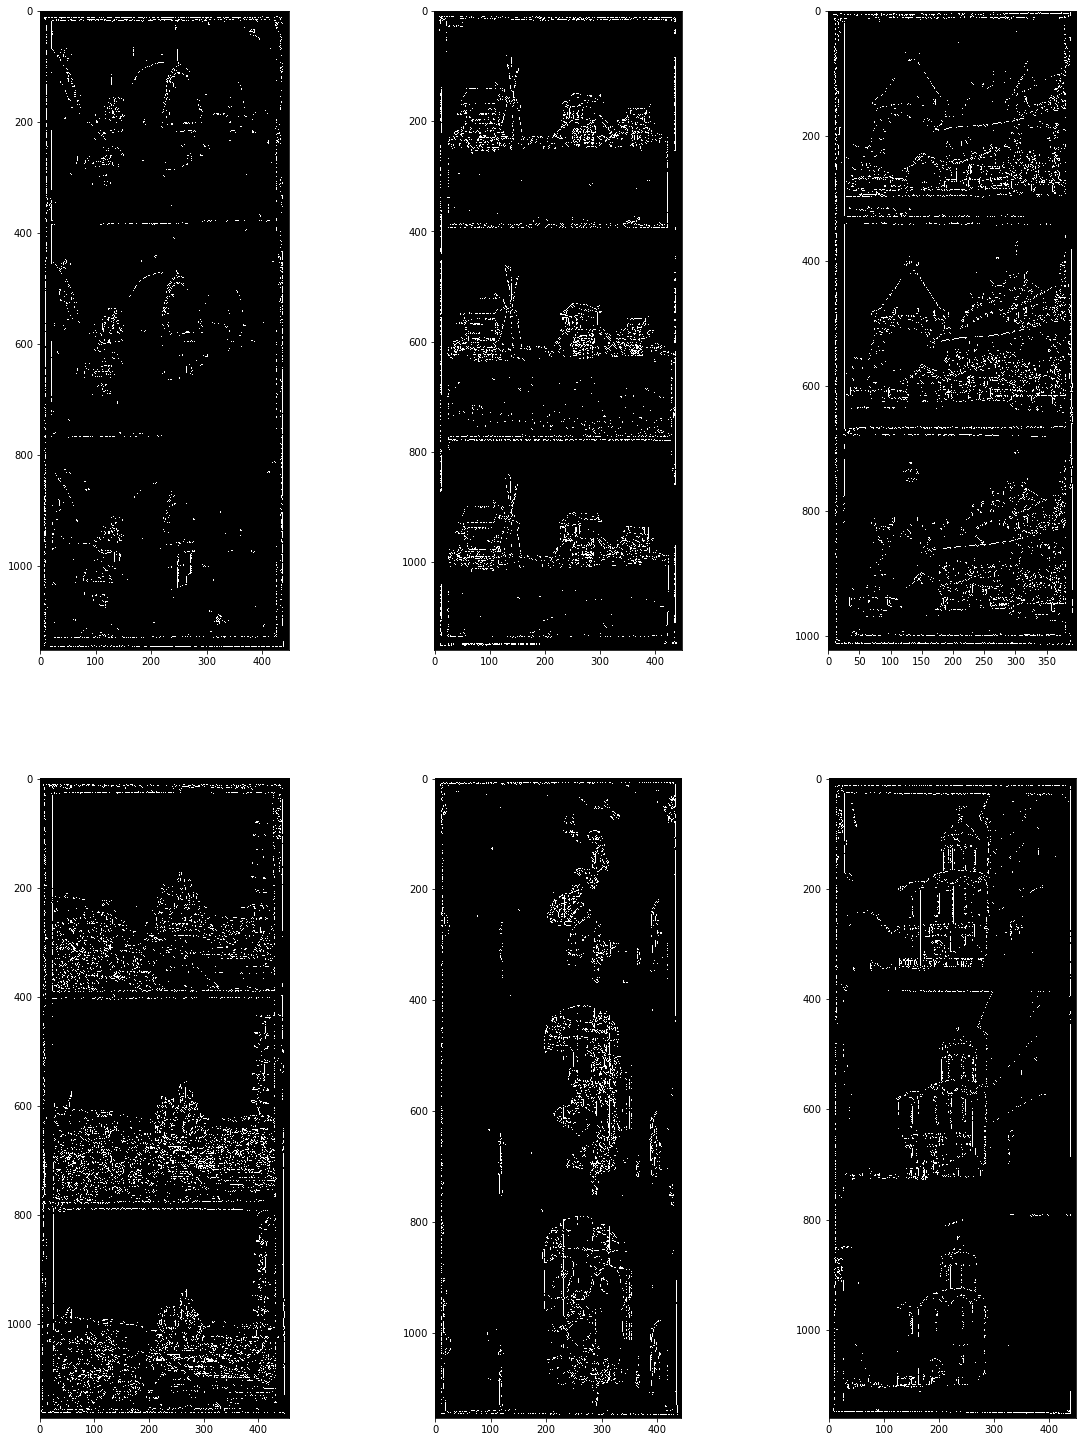

In [ ]:
#################################################################
# TODO: implement Canny detector yourself.                      #
#       You can use methods from scipy.ndimage if you need.     #
#################################################################
from  skimage.feature import canny

#0=no edge, 1=soft pixel, 2= unprocessed hard edge pixel, 3=already processed
def mark_edge(img,x,y,freq):
#     print(x,y)
    if img[x][y]==2:
        img[x][y]=3
        freq[x][y]+=1
        for dx in [-1,0,1]:
            for dy in [-1,0,1]:
                if dx==0 and dy==0:
                    continue
                if x+dx>=img.shape[0] or y+dy>=img.shape[1] or x+dx<0 or y+dy<0:
                    continue  
                if img[x+dx][y+dx]==1:
                    img[x+dx][y+dx]=2
                    img = mark_edge(img,x+dx,y+dy,freq)
    return img

def Canny_detector(img):
    """ Your implementation instead of skimage """     
    #Gaussian Blurring
    print("Gaussian blurring running...")
    canny_img = ndimage.gaussian_filter(img, sigma=1.4)
    
    #Finding gradient
    print("Finding gradient running...")
    K_x = np.array([[-1.0,0,1],[-2,0,2],[-1,0,1]])
    K_y = np.array([[1.0,2,1],[0,0,0],[-1,-2,-1]])
    
    I_x = ndimage.convolve(img.astype(float32),K_x)
    I_y = ndimage.convolve(img.astype(float32),K_y)

#     I_y = ndimage.sobel(img,axis=1,mode='constant')
    
    mag = np.hypot(I_x,I_y)
    theta = np.arctan2(I_y,(I_x+0.0000001))
#     print(canny_img.shape,mag.shape,theta.shape,mag.dtype)
#     print(K_x.dtype, I_x.dtype, mag.dtype)
#     print(np.max(theta),np.min(theta))
#     print(np.max(I_x),np.min(I_x))
#     print(np.max(I_y),np.min(I_y))
    
    print("Non maximum suppression running...")
    piby8 = 3.1415926/6
    x_max, y_max = canny_img.shape
    canny_img[0,:] = 0
    canny_img[:,0] = 0
    canny_img[x_max-1,:] = 0
    canny_img[:,y_max-1] = 0
    for x in range(1,x_max-1):
        if (x*y_max)%4000==0:
#             print(str(int(x*100.0/x_max))+"%")
            pass
        for y in range(1,y_max-1):
            if theta[x][y]<piby8 and theta[x][y]>(-piby8):
                x_n1, y_n1 = (x+1, y)
                x_n2, y_n2 = (x-1, y)
            elif theta[x][y]>piby8 and theta[x][y]<(3*piby8):
                x_n1, y_n1 = (x+1, y+1)
                x_n2, y_n2 = (x-1, y-1)
            elif theta[x][y]>3*piby8 and theta[x][y]<(5*piby8):
                x_n1, y_n1 = (x, y+1)
                x_n2, y_n2 = (x, y-1)
            elif theta[x][y]>5*piby8 and theta[x][y]<(7*piby8):
                x_n1, y_n1 = (x-1, y+1)
                x_n2, y_n2 = (x+1, y-1)
            elif theta[x][y]>7*piby8 or theta[x][y]<(-7*piby8):
                x_n1, y_n1 = (x-1, y)
                x_n2, y_n2 = (x+1, y)
            elif theta[x][y]>(-3*piby8) and theta[x][y]<(-piby8):
                x_n1, y_n1 = (x+1, y-1)
                x_n2, y_n2 = (x-1, y+1)
            elif theta[x][y]>(-5*piby8) and theta[x][y]<(-3*piby8):
                x_n1, y_n1 = (x, y-1)
                x_n2, y_n2 = (x, y+1)
            elif theta[x][y]>(-7*piby8) and theta[x][y]<(-5*piby8):
                x_n1, y_n1 = (x-1, y-1)
                x_n2, y_n2 = (x+1, y+1)
            if mag[x][y]<mag[x_n1][y_n1] or mag[x][y]<mag[x_n2][y_n2]:
                mag[x][y] = 0
            
    
    #Double threshold
    print("Double thresholding running...")
#     print(np.max(mag),np.min(mag),np.mean(mag))
    mag = mag/np.max(mag)
    th_h = 0.25
    th_l = 0.05
    canny_img[mag<th_l] = 0
    canny_img[mag>=th_h] = 2
    canny_img[(mag>=th_l)*(mag<th_h)] = 1
#     print(np.max(canny_img),np.min(canny_img),np.mean(canny_img),canny_img.dtype)
    
    print("Hysteresis running...")
    freq=np.zeros(canny_img.shape)
    for x in range(1,x_max-1):
        if (x*y_max)%4000==0:
#             print(str(int(x*100.0/x_max))+"%")
            pass
        for y in range(1,y_max-1):
            if canny_img[x][y]==2:
                canny_img = mark_edge(canny_img,x,y,freq)     
    canny_img[canny_img==1] = 0
    canny_img[canny_img>0] = 255
#     print(np.max(freq))
    
    #     return canny(img,sigma=2)
    
    return canny_img
#     return (mag*255).astype(np.uint8)


canny_imgs = []
print("This takes time, please wait...")
count=0
for img in plates:
    count+=1
    print("Running on image "+str(count)+"...")
    canny_img = Canny_detector(img)
    canny_imgs.append(canny_img)
#     break
    
visualize(canny_imgs, 'gray')

Please scroll down the above cell completely to see output images.

Upper, Lower, Left, Right (Border Crop Pixels)
0
(13, 36, 10, 31)
1
(17, 19, 13, 32)
2
(12, 28, 26, 29)
3
(12, 34, 24, 31)
4
(8, 36, 12, 32)
5
(13, 32, 12, 34)


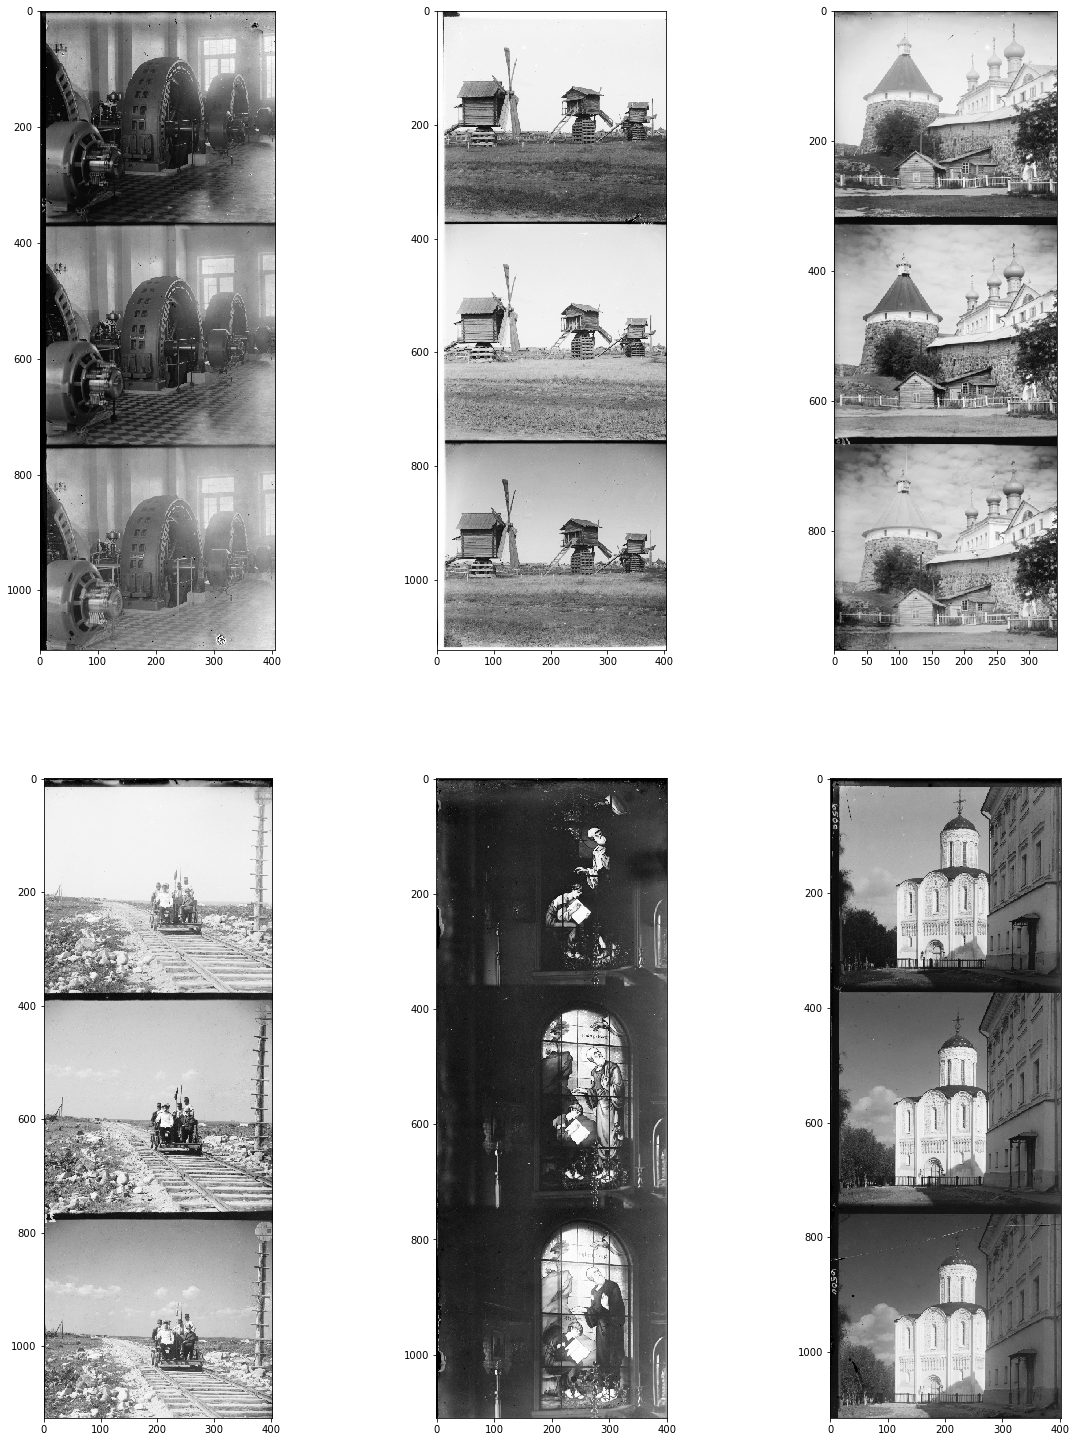

In [ ]:
#################################################################
# TODO: Implement the removal of the tape borders using         #
#       the output of Canny edge detector ("canny_img" list)    #
#################################################################

#align=0 is horizontal, align=1 is vertical border
#f_or_l=0 for up and left, =1 for down and right
def find_border(patch, align, f_or_l):
    loc=1
    thresh=0.8
    x_dim,y_dim = patch.shape
#     print(patch.shape)
    if align==0:
        tmp = np.copy(patch)
        tmp[tmp>128] = 1
        count = np.sum(tmp,axis=1)
#         print(count)
#         print(count.shape,tmp.shape,count.max(),count.argmax())
        count=count.astype(int32)
        count[count>thresh*count.max()]=-1
#         print(count)
                
        for i in range(count.shape[0]):
            if count[i]==-1:
                loc=i
                if f_or_l==1:
                    break
#         print(loc)
    elif align==1:
        tmp = np.copy(patch)
        tmp[tmp>128] = 1
        count = np.sum(tmp,axis=0)
#         print(count.max(),count.argmax())
        count=count.astype(int32)
        count[count>thresh*count.max()]=-1
#         print(count)
        for i in range(count.shape[0]):
            if count[i]==-1:
                loc=i
                if f_or_l==1:
                    break
#         print(loc)
    return max(loc,1)   


def remove_borders(img, canny_img):
    """ Your implementation instead of the following one"""   
    rows,cols = canny_img.shape
    width = int(0.1*min(rows,cols))
#     print(canny_img.shape)
    d_up = find_border(canny_img[:width,:],0,0)
    
    d_down = find_border(canny_img[-width:,:],0,1)
    
    d_l = find_border(canny_img[:,:width],1,0)
    
    d_r = find_border(canny_img[:,-width:],1,1)
    
    print(d_up,d_down,d_l,d_r)
    return img[d_up : -d_down, d_l : -d_r]


cropped_imgs = []
#crop borders
print("Upper, Lower, Left, Right (Border Crop Pixels)")
for i, img in enumerate(plates):
    print(i)
    cropped_imgs.append(remove_borders(img, canny_imgs[i]))
#     break

visualize(cropped_imgs, 'gray')

#### Channels separation  (0.5 points)

The next step is to separate the image into three channels (B, G, R) and make one colored picture. To get channels, you can divide each plate into three equal parts.

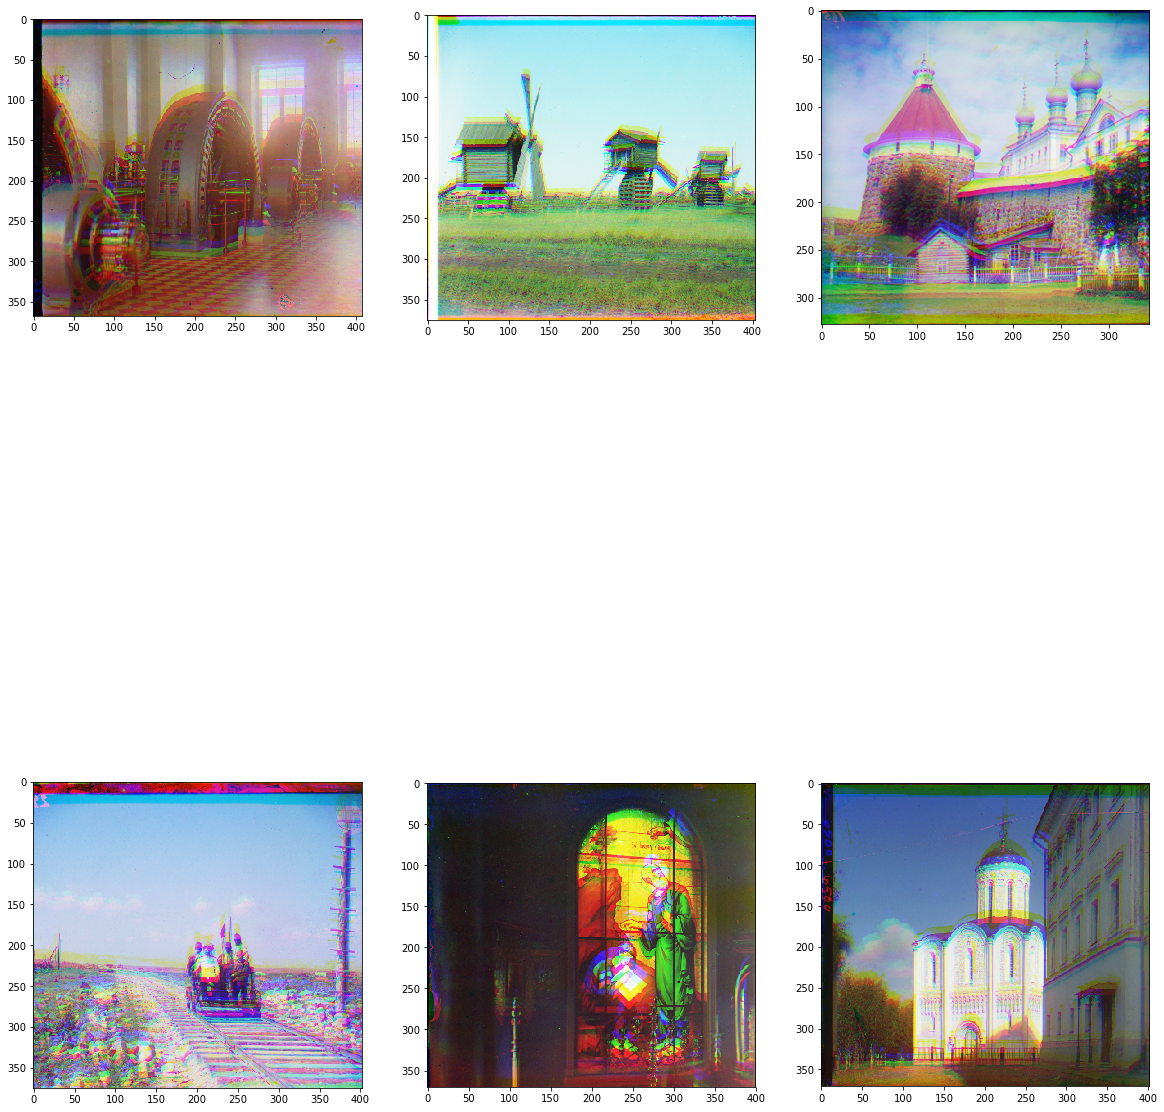

In [ ]:
#################################################################
# TODO: implement the function impose_components transforming   #
#       cropped black-and-white images cropped_imgs             #
#       into the list of RGB images rgb_imgs                    #
#################################################################
def impose_components(img):
    rows=len(img)
#     print(rows/3)
    imposed_image = []
    imposed_image.append(np.array(img[2*(rows/3):3*(rows/3),:]))
    imposed_image.append(np.array(img[(rows/3):2*(rows/3),:]))
    imposed_image.append(np.array(img[0:rows/3,:]))
#     print(imposed_image[0].shape)
#     print(imposed_image[1].shape)
#     print(imposed_image[2].shape)
    imposed_image = np.asarray(imposed_image)
    return imposed_image


rgb_imgs = []
for cropped_img in cropped_imgs:
    rgb_img = impose_components(cropped_img)
#     print(rgb_img.shape)
    rgb_imgs.append(rgb_img)

visualize(rgb_imgs)

In [ ]:
print(rgb_imgs[0].shape)

(3, 368, 407)


#### Search for the best shift for channel alignment (1 point for metrics implementation + 2 points for channel alignment)

In order to align two images, we will shift one image relative to another within some limits (e.g. from $-15$ to $15$ pixels). For each shift, we can calculate some metrics in the overlap of the images. Depending on the metrics, the best shift is the one the metrics achieves the greatest or the smallest value for. We suggest that you implement two metrics and choose the one that allows to obtain the better alignment quality:

* *Mean squared error (MSE):*<br><br>
$$ MSE(I_1, I_2) = \dfrac{1}{w * h}\sum_{x,y}(I_1(x,y)-I_2(x,y))^2, $$<br> where *w, h* are width and height of the images, respectively. To find the optimal shift you should find the minimum MSE over all the shift values.
    <br><br>
* *Normalized cross-correlation (CC):*<br><br>
    $$
    I_1 \ast I_2 = \dfrac{\sum_{x,y}I_1(x,y)I_2(x,y)}{\sum_{x,y}I_1(x,y)\sum_{x,y}I_2(x,y)}.
    $$<br>
    To find the optimal shift you should find the maximum CC over all the shift values.

The above formula for normalized CC seems to be incorrect. I have used the definition from the following link, which seems to make more sense (analogous to the definition of dot product) https://www.mathworks.com/matlabcentral/answers/uploaded_files/80198/Screenshot%202017-06-10%2021.08.39.png

In [ ]:
import numpy as np
import skimage

In [ ]:
#################################################################
# TODO: implement the functions mse и cor calculating           #
#       mean squared error and normalized cross-correlation     #
#       for two input images, respectively (1 point)            #
#################################################################
def mse(X, Y):
    w,h = X.shape
#     print(X.shape,Y.shape)
    X1 = np.copy(X)
    X1[Y==0] = 0 #to avoid skewed MSE due to shifted channel image's zero values
#     print(filt.shape)
    err = 1.0*np.sum((1.0*(X1-Y)**2))/(w*h)
    return err
    

def cor(X, Y):
#     print(X.max(),Y.max(),np.sum(X))
#     num = np.sum(np.multiply(X,Y)) #according to formula provided
#     den = np.sum(X)*np.sum(X)
    num = np.sum(np.multiply(X,Y)) 
    den = np.sqrt(np.sum(np.multiply(X,X)))*np.sqrt(np.sum(np.multiply(Y,Y))) #correct formula for denominator
#     print(num,den)
    return 1.0*num/den

1
2
3
4
5
6


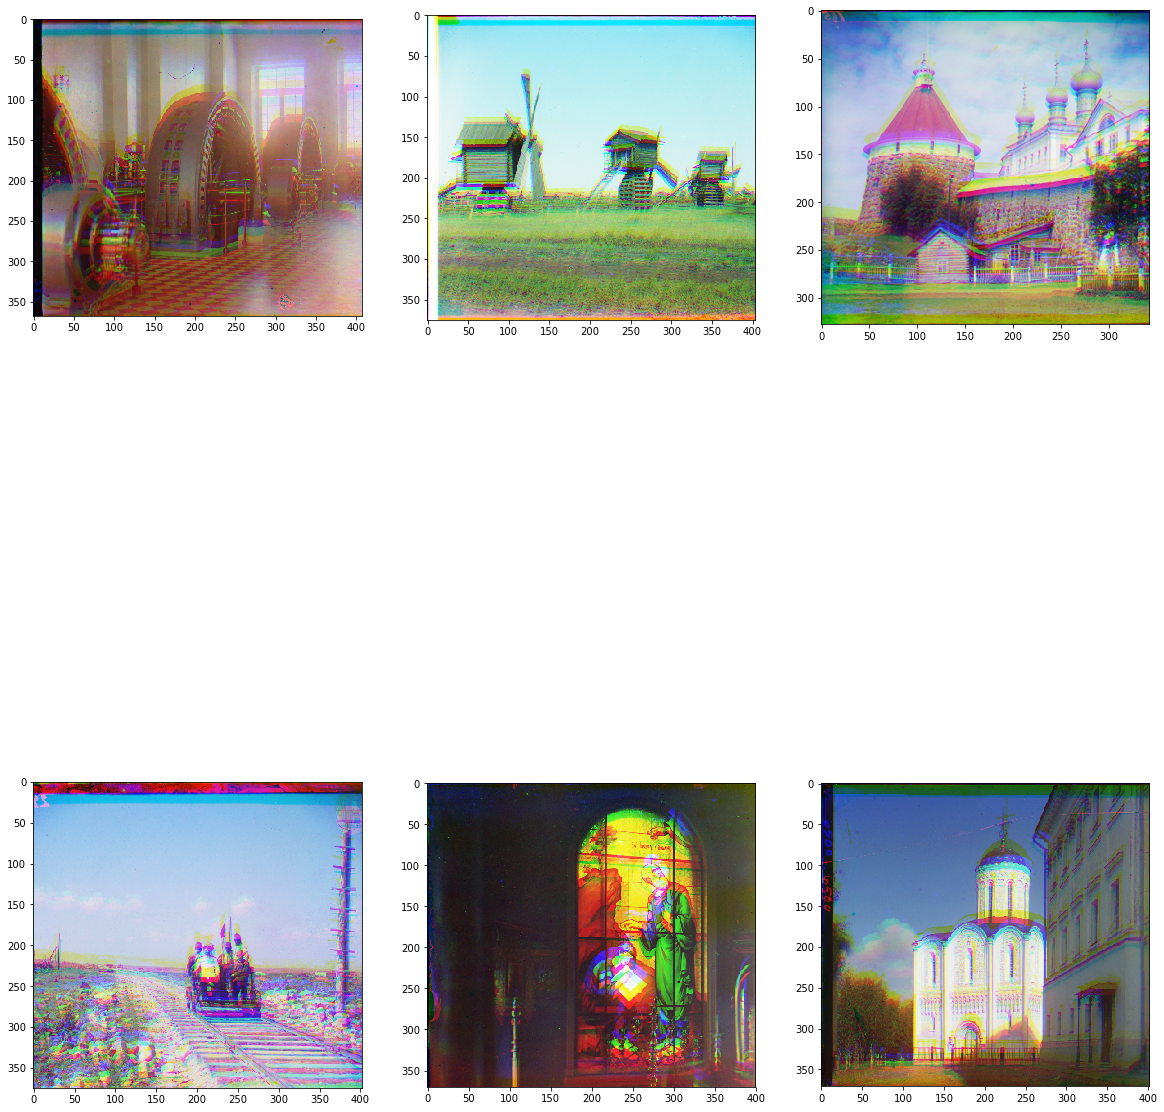

In [ ]:
#################################################################
# TODO: implement the algorithm to find the best channel        #
#       shift and the alignment. Apply this algorithm for       #
#       rgb_imgs processing and get the final list of colored   #
#       pictures. These images will be used for the evaluation  #
#       of the quality of the whole algorithm.  (2 points)      #
#                                                               #
#       You can use the following interface or write your own.  #
#################################################################

#shift channel 2, keep channel 1 same
def get_best_shift_mse(channel1, channel2):
#     print(channel1.shape)
    rows,cols = channel2.shape
    delta=15
    min_mse = mse(channel1,channel2)
#     print("Min start:"+str(min_mse))
    best_c2 = np.copy(channel2)
    for x_shift in range(-delta,delta+1):
        for y_shift in range(-delta,delta+1):
            M = np.float32([[1,0,x_shift],[0,1,y_shift]])
            c2 = cv2.warpAffine(channel2,M,(cols,rows))
#             print(channel2.shape,c2.shape)
            cur_mse = mse(channel1,c2)
            if cur_mse<min_mse:
                best_c2=np.copy(c2)
                min_mse=cur_mse
#     print("Min final:"+str(min_mse))
    return best_c2

def get_best_shift_cor(channel1, channel2):
#     print(channel1.shape)
    rows,cols = channel2.shape
    delta=15
    max_cor = cor(channel1,channel2)
#     print("Max start:"+str(max_cor))
    best_c2 = np.copy(channel2)
    for x_shift in range(-delta,delta+1):
        for y_shift in range(-delta,delta+1):
            M = np.float32([[1,0,x_shift],[0,1,y_shift]])
            c2 = cv2.warpAffine(channel2,M,(cols,rows))
#             print(channel2.shape,c2.shape)
            cur_cor = cor(channel1,c2)
            if cur_cor>max_cor:
                best_c2=np.copy(c2)
                max_cor=cur_cor
#     print("Max final:"+str(max_cor))
    return best_c2
    


def get_best_image(rgb_img):
#     print(rgb_img.shape)
    c1 = rgb_img[0,:,:]
#     c2 = get_best_shift_mse(c1,rgb_img[1,:,:])
#     c3 = get_best_shift_mse(c1,rgb_img[2,:,:])
    c2 = get_best_shift_cor(c1,rgb_img[1,:,:])
    c3 = get_best_shift_cor(c1,rgb_img[2,:,:])
    best_img = np.zeros(rgb_img.shape)
#     print(c1.shape,c2.shape,c3.shape)
    best_img[0,:,:] = np.copy(c1)
    best_img[1,:,:] = np.copy(c2)
    best_img[2,:,:] = np.copy(c3)
    best_img = np.copy(rgb_img)
    return best_img


count=0
final_imgs = []
for img in rgb_imgs:
    count+=1
    print(count)
    final_img = get_best_image(img)
    final_imgs.append(final_img)
#     print(final_img.shape)
#     break

visualize(final_imgs)

Correlation works marginally better than MSE. 

# Face Alignment (2.5 points)

In this task, you have to implement face normalization and alignment. Most of the face images deceptively seem to be aligned, but since many face recognition algorithms are very sensitive to shifts and rotations, we need not only to find a face on the image but also normalize it. Besides, the neural networks usually used for recognition have fixed input size, so, the normalized face images should be resized as well.

There are six images of faces you have to normalize. In addition, you have the coordinates of the eyes in each of the pictures. You have to rotate the image so that the eyes are on the same height, crop the square box containing the face and transform it to the size $224\times 224.$ The eyes should be located symmetrically and in the middle of the image (on the height).

Here is an example of how the transformation should look like.

<img src = "https://cdn1.savepice.ru/uploads/2017/12/13/286e475ef7a4f4e59005bcf7de78742f-full.jpg">

#### Get data
You get the images and corresponding eyes coordinates for each person. You should implement the  function $\tt{load}$\_$\tt{faces}$\_$\tt{and}$\_$\tt{eyes}$ that reads the data and returns two dictionaries: the dictionary of images and the dictionary of eyes coordinates. Eyes coordinates is a list of two tuples $[(x_1,y_1),(x_2,y_2)]$.
Both dictionaries should have filenames as the keys.

$\tt{dir}$\_$\tt{name}$ is the path to the directory with face images, $\tt{eye}$\_$\tt{path}$ is the path to .pickle file with eyes coordinates. If these directory and file are located in the same directory as this notebook, then default arguments can be used.

In [ ]:
import pickle

In [ ]:
def load_faces_and_eyes(dir_name = 'faces_imgs', eye_path = './eyes.pickle'):
    faces={}
    for filename in os.listdir(dir_name):
        img = cv2.cvtColor(cv2.imread(os.path.join(dir_name,filename)), cv2.COLOR_BGR2RGB)
        if img is not None:
            faces[filename] = img
    pickle_in = open(eye_path,"rb")
    eyes = pickle.load(pickle_in)
    return faces,eyes
    
    
faces, eyes = load_faces_and_eyes()

Here is how the input images look like:

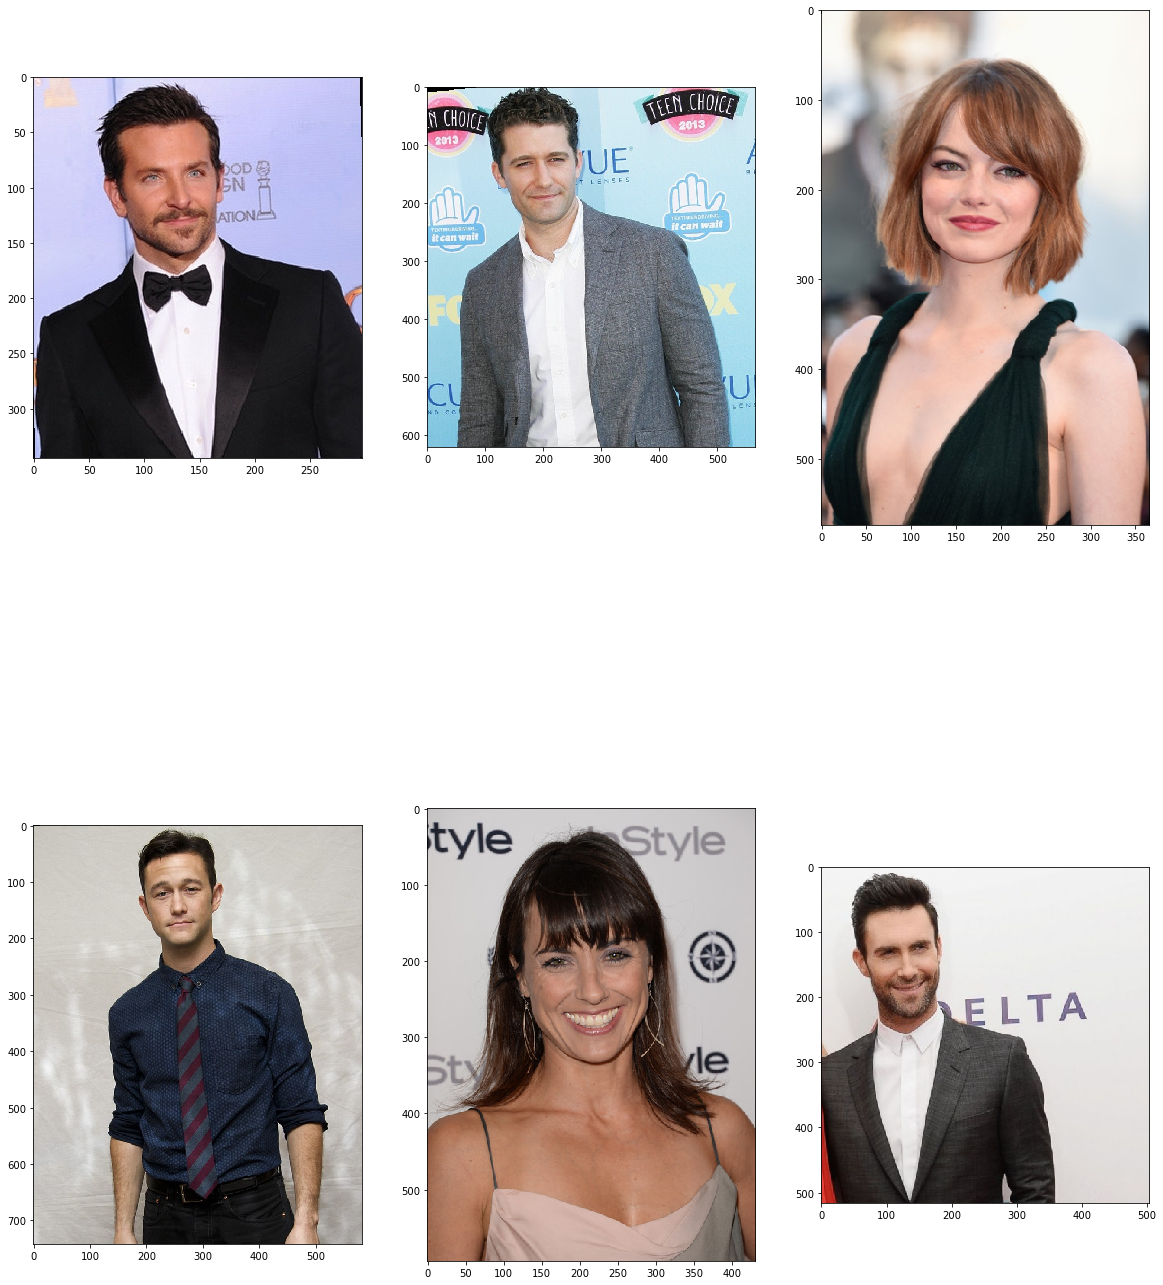

In [ ]:
visualize(faces.values())

You may make the transformation using your own algorithm or by the following steps:
1. Find the angle between the segment connecting two eyes and horizontal line;
2. Rotate the image;
3. Find the coordinates of the eyes on the rotated image
4. Find the width and height of the box containing the face depending on the eyes coordinates
5. Crop the box and resize it to $224\times224$

In [ ]:
print(eyes.values()[0])
print(faces.values()[0].shape)
a=eyes.values()[0][0]
b=eyes.values()[0][1]
c=tuple(map(lambda x, y: (x + y)/2, a, b))
print(c)

[(108, 92), (145, 88)]
(345, 297, 3)
(126, 90)


In [ ]:
import math,skimage
import numpy as np

In [ ]:
#################################################################
# TODO: implement the function transform_face that rotates      #
#       the image so that the eyes have equal ordinate,         #
#       crops the square box containing face and resizes it.    #
#       You can use methods from skimage library if you need.   #
#       (2.5 points)                                              #
#################################################################

def transform_face(image, eyes):
    cols,rows,_ = image.shape
#     print(image.shape)
#     print(eyes)
    diff_x,diff_y = tuple(map(lambda x, y: (x - y), eyes[0], eyes[1]))
#     print(diff_x)
#     print(diff_y)
    angle  = math.degrees(math.atan(diff_y*1.0/diff_x))
#     print(angle)
    M = cv2.getRotationMatrix2D(eyes[0],angle,1)
    transformed = np.array(cv2.warpAffine(img,M,(cols,rows)))
    
    eye1 = np.asarray(eyes[0])
    eye2 = np.asarray(eyes[1])
    dist = math.sqrt(np.sum((eye1-eye2)**2))
#     print(eye1,eye2,dist)
       
    #finding new coordinates of eyes
    new_eye1 = eye1
    new_eye2 = np.copy(eye1)
    new_eye2[0] = eye1[0]+dist
#     print(new_eye1,new_eye2)
    
    #crop square image of side = 6*distance between eyes (heuristic that works well)
    centre = (new_eye1 + new_eye2)/2
    dim = int(dist*3)
    #ensure that array indices dont overflow
    dim = min(dim,new_eye1[0])
    dim = min(dim,new_eye1[1])
#     print(centre,dim)
    
    transformed = transformed[centre[1]-dim:centre[1]+dim,centre[0]-dim:centre[0]+dim]
#     print(transformed.shape)

    transformed = skimage.transform.resize(transformed, (224,224,3))
    
    return transformed

2.jpg
6.jpg
4.jpg
5.jpg
3.jpg
1.jpg


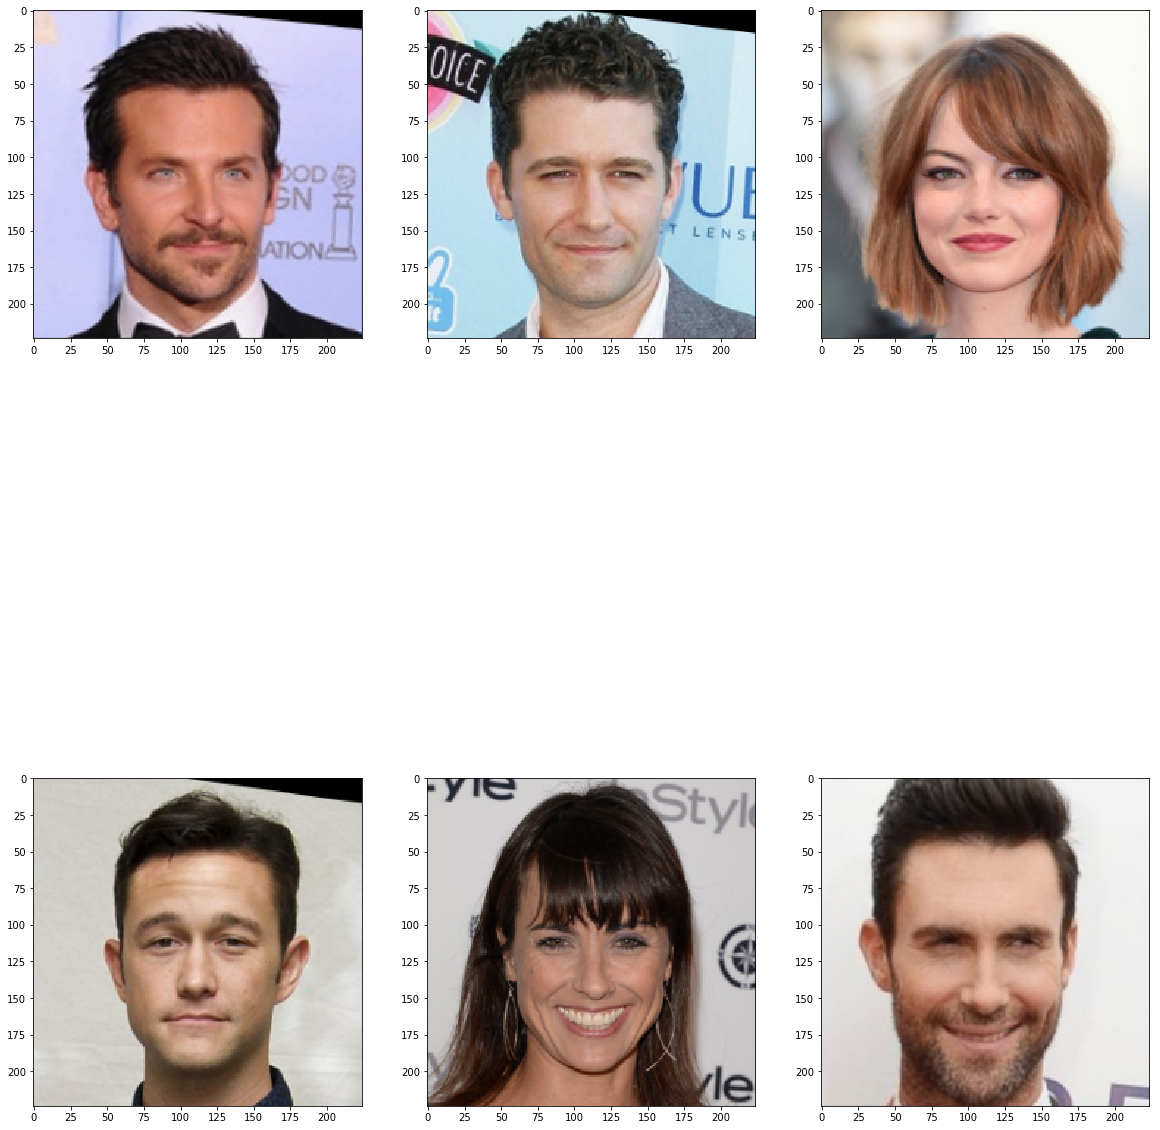

In [ ]:
transformed_imgs = []
for i in faces:
    print(i)
    img = faces[i]
    eye = eyes[i]
    transformed = transform_face(img, eye)
    transformed_imgs.append(transformed)
#     break
    
visualize(transformed_imgs)